# LightGBM Lambda Rank Example

In [1]:
from sklearn.model_selection import RandomizedSearchCV
import lightgbm as lgb
import numpy as np
import pandas as pd
from sklearn.datasets import load_svmlight_file
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import numpy as np
from scipy.stats import spearmanr
import matplotlib.pyplot as plt
%matplotlib inline  

In [2]:
X_train, y_train = load_svmlight_file('./rank.train.txt')
X_test, y_test = load_svmlight_file('./rank.test.txt')
q_train = np.loadtxt('./rank.train.query.txt')
q_test = np.loadtxt('./rank.test.query.txt')

In [3]:
q_train = q_train.astype(np.int64)
q_test = q_test.astype(np.int64)
q_train.sum(), X_train.shape, y_train.shape, q_train.shape, q_test.shape

(3005, (3005, 300), (3005,), (201,), (50,))

In [4]:
X_train.todense()[:3,:10]

matrix([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.89],
        [0.69, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
        [0.69, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]])

In [5]:
np.unique(y_train)

array([0., 1., 2., 3., 4.])

In [6]:
q_train

array([ 1, 13,  5,  8, 19, 12, 18,  5, 14, 13,  8,  9, 16, 11, 21, 14, 21,
        9, 14, 11, 20, 18, 13, 20, 22, 22, 13, 17, 10, 13, 12, 13, 13, 23,
       18, 13, 20, 12, 22, 14, 13, 23, 13, 14, 14,  5, 13, 15, 14, 14, 16,
       16, 15, 21, 22, 10, 22, 18, 25, 16, 12, 12, 15, 15, 25, 13,  9, 12,
        8, 16, 25, 19, 24, 12, 16, 10, 16,  9, 17, 15,  7,  9, 15, 14, 16,
       17,  8, 17, 12, 18, 23, 10, 12, 12,  4, 14, 12, 15, 27, 16, 20, 13,
       19, 13, 17, 17, 16, 12, 15, 14, 14, 19, 12, 23, 18, 16,  9, 23, 11,
       15,  8, 10, 10, 16, 11, 15, 22, 16, 17, 23, 16, 22, 17, 14, 12, 14,
       20, 15, 17, 15, 15, 22,  9, 21,  9, 17, 16, 15, 13, 13, 15, 14, 18,
       21, 14, 17, 15, 14, 16, 12, 17, 19, 16, 11, 18, 11, 13, 14,  9, 16,
       15, 16, 25,  9, 13, 22, 16, 18, 20, 14, 11,  9, 16, 19, 19, 11, 11,
       13, 14, 14, 13, 16,  6, 21, 16, 12, 16, 11, 24, 12, 10],
      dtype=int64)

In [7]:
dtrain = lgb.Dataset(X_train, label=y_train)
dtest = lgb.Dataset(X_test, label=y_test)
dtrain.set_group(q_train)
dtest.set_group(q_test)
param = {'num_leaves': 3,  # 2^5-1, so it's like max_depth of 5
         'objective': 'lambdarank',
         "boosting": "gbdt",
         'learning_rate': 0.3,
         'seed': 31415,
         'bagging_fraction': 0.85,
         'feature_fraction': 1,
         'lambda_l1': 0,
         'lambda_l2': 1,
         # 'multi_logloss,multi_error','binary_logloss','binary_error'
         'metric': 'ndcg',
         'bagging_freq': 1,
         'min_data_in_leaf': 5,
         # 'min_sum_hessian_in_leaf':10.0,
         # 'cegb_penalty_split': 0.1
         }
model = lgb.train(param, dtrain, 10, valid_sets=[
                          dtest, dtrain])


[1]	training's ndcg@1: 0.544989	training's ndcg@2: 0.586787	training's ndcg@3: 0.611252	training's ndcg@4: 0.624702	training's ndcg@5: 0.633483	valid_0's ndcg@1: 0.530286	valid_0's ndcg@2: 0.578533	valid_0's ndcg@3: 0.588915	valid_0's ndcg@4: 0.62453	valid_0's ndcg@5: 0.638887
[2]	training's ndcg@1: 0.666667	training's ndcg@2: 0.667847	training's ndcg@3: 0.661564	training's ndcg@4: 0.667116	training's ndcg@5: 0.672629	valid_0's ndcg@1: 0.651429	valid_0's ndcg@2: 0.659135	valid_0's ndcg@3: 0.659231	valid_0's ndcg@4: 0.682992	valid_0's ndcg@5: 0.697037
[3]	training's ndcg@1: 0.696375	training's ndcg@2: 0.696544	training's ndcg@3: 0.680639	training's ndcg@4: 0.682932	training's ndcg@5: 0.688	valid_0's ndcg@1: 0.674095	valid_0's ndcg@2: 0.699994	valid_0's ndcg@3: 0.701018	valid_0's ndcg@4: 0.718146	valid_0's ndcg@5: 0.735156
[4]	training's ndcg@1: 0.702488	training's ndcg@2: 0.704557	training's ndcg@3: 0.690464	training's ndcg@4: 0.695434	training's ndcg@5: 0.702818	valid_0's ndcg@1: 0.664

In [8]:
p0, p1 = model.predict(X_train), model.predict(X_test)

In [9]:
pd.Series(y_train).value_counts()

1.0    1211
2.0     858
0.0     645
3.0     222
4.0      69
dtype: int64

In [10]:
pd.Series(p0).describe()

count    3005.000000
mean       -0.040126
std         0.171954
min        -0.321698
25%        -0.152220
50%        -0.062299
75%         0.016827
max         0.618650
dtype: float64

In [11]:
spearmanr(y_train, p0), spearmanr(y_test, p1)

(SpearmanrResult(correlation=0.4727368212568763, pvalue=3.565480388130427e-167),
 SpearmanrResult(correlation=0.4419897115609285, pvalue=4.5545549314555176e-38))

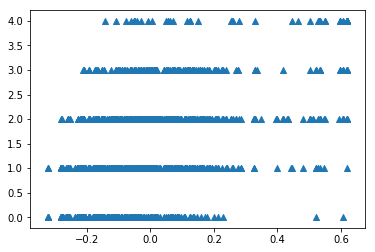

In [12]:
d_= pd.DataFrame({"actual":y_train, "pred":p0})
plt.scatter(d_.pred, d_.actual, marker='^')

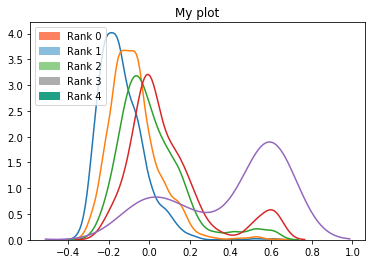

In [13]:
pred = model.predict(X_train)
d_= pd.DataFrame({"actual":y_train, "pred":pred})

cmaps = ['Reds', 'Blues', 'Greens', 'Greys', 'viridis_r']
label_patches = []
for i, cmap in enumerate(cmaps):
    label = 'Rank {}'.format(i)
    sns.kdeplot(d_.query("actual == @i").pred.values)
    label_patch = mpatches.Patch(
        color=sns.color_palette(cmaps[i])[2],
        label=label)
    label_patches.append(label_patch)
plt.title('My plot')
plt.legend(handles=label_patches, loc='upper left')
plt.show()

# XGBoost Lambda Rank Example

In [14]:
#!/usr/bin/python
import xgboost as xgb
from xgboost import DMatrix
from sklearn.datasets import load_svmlight_file

#  This script demonstrate how to do ranking with xgboost.train
x_train, y_train = load_svmlight_file("mq2008.train")
x_valid, y_valid = load_svmlight_file("mq2008.vali")
x_test, y_test = load_svmlight_file("mq2008.test")

group_train = []
with open("mq2008.train.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_train.append(int(line.split("\n")[0]))

group_valid = []
with open("mq2008.vali.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_valid.append(int(line.split("\n")[0]))

group_test = []
with open("mq2008.test.group", "r") as f:
    data = f.readlines()
    for line in data:
        group_test.append(int(line.split("\n")[0]))

In [15]:
np.array(group_train).sum(), x_train.shape, y_train.shape, np.array(group_train).shape

(9630, (9630, 46), (9630,), (471,))

In [16]:
np.unique(y_train)

array([0., 1., 2.])

In [17]:
x_train.todense()[:5,:5]

matrix([[0.007477, 0.      , 1.      , 0.      , 0.00747 ],
        [0.603738, 0.      , 1.      , 0.      , 0.603175],
        [0.214953, 0.      , 0.      , 0.      , 0.213819],
        [0.      , 0.      , 1.      , 0.      , 0.      ],
        [1.      , 1.      , 0.      , 0.      , 1.      ]])

In [18]:
group_train[:20]

[8, 8, 8, 8, 8, 16, 8, 118, 16, 8, 8, 8, 7, 8, 16, 8, 16, 8, 32, 8]

In [19]:
train_dmatrix = DMatrix(x_train, y_train)
valid_dmatrix = DMatrix(x_valid, y_valid)
test_dmatrix = DMatrix(x_test)

train_dmatrix.set_group(group_train)
valid_dmatrix.set_group(group_valid)

params = {'objective': 'rank:ndcg', 'eta': 0.1, 'gamma': 1.0,
               'min_child_weight': 2, 'max_depth': 3,
          'eval_metric':['ndcg', 'map']}
xgb_model = xgb.train(params, train_dmatrix, num_boost_round=20,
                           evals=[(valid_dmatrix, 'validation'), (train_dmatrix, 'train')])
pred = xgb_model.predict(test_dmatrix)
d_= pd.DataFrame({"actual":y_test, "pred":pred})

[0]	validation-ndcg:0.797064	validation-map:0.720349	train-ndcg:0.817089	train-map:0.745871
[1]	validation-ndcg:0.794886	validation-map:0.722388	train-ndcg:0.824353	train-map:0.757491
[2]	validation-ndcg:0.794456	validation-map:0.722302	train-ndcg:0.826989	train-map:0.760502
[3]	validation-ndcg:0.794325	validation-map:0.721565	train-ndcg:0.824726	train-map:0.756849
[4]	validation-ndcg:0.794283	validation-map:0.721497	train-ndcg:0.824668	train-map:0.757129
[5]	validation-ndcg:0.793943	validation-map:0.720747	train-ndcg:0.824382	train-map:0.756158
[6]	validation-ndcg:0.794019	validation-map:0.720234	train-ndcg:0.827162	train-map:0.758941
[7]	validation-ndcg:0.790628	validation-map:0.715117	train-ndcg:0.829193	train-map:0.760798
[8]	validation-ndcg:0.789792	validation-map:0.714002	train-ndcg:0.828374	train-map:0.759605
[9]	validation-ndcg:0.795784	validation-map:0.719004	train-ndcg:0.829304	train-map:0.762215
[10]	validation-ndcg:0.795721	validation-map:0.718245	train-ndcg:0.831187	train-

In [20]:
d_.query("actual == 0").pred.describe(), d_.query("actual == 1").pred.describe(), d_.query("actual == 2").pred.describe()

(count    2319.000000
 mean       -0.088351
 std         0.667834
 min        -0.764012
 25%        -0.679615
 50%        -0.308077
 75%         0.336342
 max         1.547803
 Name: pred, dtype: float64, count    378.000000
 mean       0.517314
 std        0.620555
 min       -0.764012
 25%        0.183438
 50%        0.427956
 75%        1.059256
 max        1.503074
 Name: pred, dtype: float64, count    177.000000
 mean       0.752783
 std        0.573248
 min       -0.764012
 25%        0.302004
 50%        0.921346
 75%        1.243922
 max        1.499445
 Name: pred, dtype: float64)

In [21]:
spearmanr(y_train, xgb_model.predict(train_dmatrix)), spearmanr(y_valid, xgb_model.predict(valid_dmatrix))

(SpearmanrResult(correlation=0.3594971276993028, pvalue=1.0709227340863423e-291),
 SpearmanrResult(correlation=0.371356592536086, pvalue=2.8369158887868454e-89))

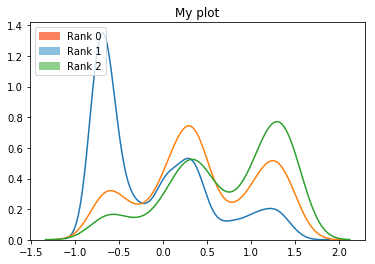

In [22]:
pred = xgb_model.predict(train_dmatrix)
d_= pd.DataFrame({"actual":y_train, "pred":pred})

cmaps = ['Reds', 'Blues', 'Greens']
label_patches = []
for i, cmap in enumerate(cmaps):
    label = 'Rank {}'.format(i)
    sns.kdeplot(d_.query("actual == @i").pred.values)
    label_patch = mpatches.Patch(
        color=sns.color_palette(cmaps[i])[2],
        label=label)
    label_patches.append(label_patch)
plt.title('My plot')
plt.legend(handles=label_patches, loc='upper left')
plt.show()

#### Compare XGBoost's version to LightGBM's

In [23]:
dtrain = lgb.Dataset(x_train, label=y_train)
dtest = lgb.Dataset(x_valid, label=y_valid)
dtrain.set_group(group_train)
dtest.set_group(group_valid)
param = {'num_leaves': 3,  # 2^5-1, so it's like max_depth of 5
         'objective': 'lambdarank',
         "boosting": "gbdt",
         'learning_rate': 0.3,
         'seed': 31415,
         'bagging_fraction': 0.85,
         'feature_fraction': 1,
         'lambda_l1': 0,
         'lambda_l2': 1,
         # 'multi_logloss,multi_error','binary_logloss','binary_error'
         'metric': 'ndcg',
         'bagging_freq': 1,
         'min_data_in_leaf': 5,
         # 'min_sum_hessian_in_leaf':10.0,
         # 'cegb_penalty_split': 0.1
         }
model = lgb.train(param, dtrain, 10, valid_sets=[
                          dtest, dtrain])


[1]	training's ndcg@1: 0.622081	training's ndcg@2: 0.634536	training's ndcg@3: 0.662769	training's ndcg@4: 0.685921	training's ndcg@5: 0.704289	valid_0's ndcg@1: 0.577495	valid_0's ndcg@2: 0.617185	valid_0's ndcg@3: 0.646671	valid_0's ndcg@4: 0.669061	valid_0's ndcg@5: 0.698126
[2]	training's ndcg@1: 0.632696	training's ndcg@2: 0.662462	training's ndcg@3: 0.685411	training's ndcg@4: 0.703767	training's ndcg@5: 0.723007	valid_0's ndcg@1: 0.626327	valid_0's ndcg@2: 0.666307	valid_0's ndcg@3: 0.694999	valid_0's ndcg@4: 0.706281	valid_0's ndcg@5: 0.728409
[3]	training's ndcg@1: 0.649682	training's ndcg@2: 0.669886	training's ndcg@3: 0.693683	training's ndcg@4: 0.714905	training's ndcg@5: 0.731053	valid_0's ndcg@1: 0.660297	valid_0's ndcg@2: 0.68382	valid_0's ndcg@3: 0.712061	valid_0's ndcg@4: 0.718683	valid_0's ndcg@5: 0.745724
[4]	training's ndcg@1: 0.655343	training's ndcg@2: 0.674572	training's ndcg@3: 0.694554	training's ndcg@4: 0.71672	training's ndcg@5: 0.737582	valid_0's ndcg@1: 0.6

In [24]:
spearmanr(y_train, model.predict(x_train)), spearmanr(y_valid, model.predict(x_valid))

(SpearmanrResult(correlation=0.35839874028426993, pvalue=8.384525608264391e-290),
 SpearmanrResult(correlation=0.38983258290404416, pvalue=5.896622785115345e-99))